# **Assignment 7**
# **Flares – temporal evolution and magnetic field structure. Part I.**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | April, 2021**
### **by Victoria Krivova, Polina Starodumova**

Analysis of an X-class flare, observed with the Atmospheric Imaging Assembly (AIA) onboard NASA’s SDO satellite in the UV wavelengths domain at 1700 Å, the HMI instrument onboard SDO (continuum and magnetic field maps) as well as the full-disk integrated soft X-ray flux by the GOES satellite. The flare occurred on 2014 October 24, with start time around ~21 UT.

In [93]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import imageio
from PIL import Image
import scipy
import sunpy
import sunpy.map

We will work with SDO/AIA 1700 Å data during one hour of a flare for the time range  21:00  UT  to  22:00  UT, with  a  reduced  time  cadence  of  72  sec.

In [2]:
# Import files
files = [sunpy.io.fits.read('AIA_1700_%02d.fits' % i)[0] for i in range(49)]

In [3]:
data = [files[i].data for i in range(49)]
header = [files[i].header for i in range(49)]

**First, let's work only with one time step to obtain the right images. By plotting the files we've manually chosen the one with the highest flare expression – it is well developed and bright:**

Text(0.5, 1.0, 'UV 1700 Å filtergram of the Sun')

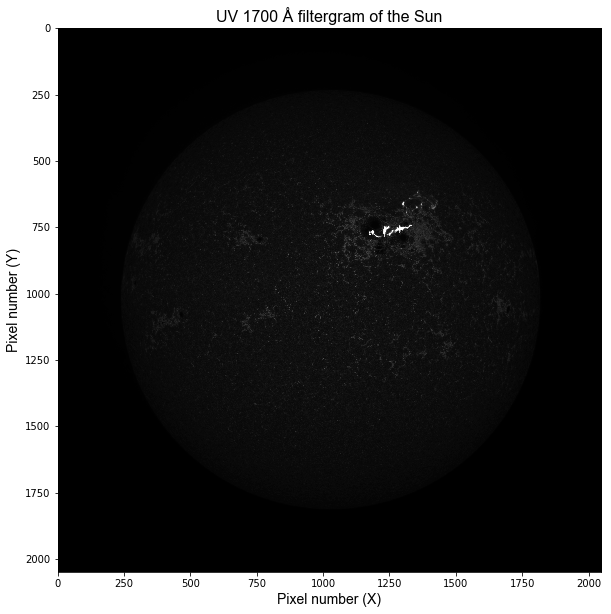

In [4]:
# observe the whole image of the Sun 

axis_font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'size':'16'} 

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel('Pixel number (X)', **axis_font)
ax.set_ylabel('Pixel number (Y)',  **axis_font)
ax.imshow(data[12], cmap='Greys_r')
ax.set_title('UV 1700 Å filtergram of the Sun', **title_font)

In [5]:
# extracting the field of interest around the flares 
a = 590
b = 850
c = 1100
d = 1450

Text(0.5, 1.0, 'UV filtergram of a flare area')

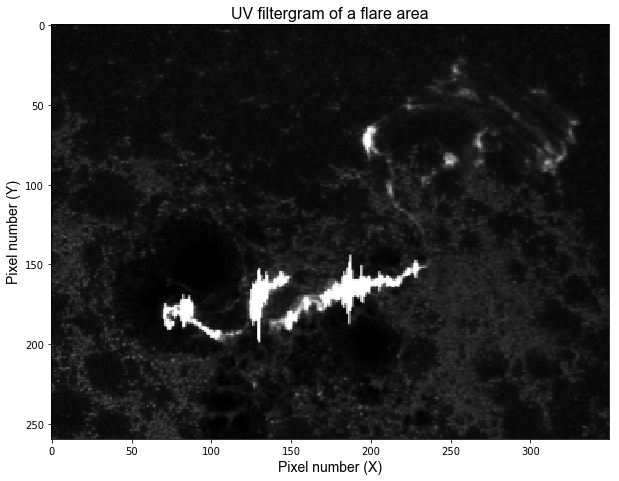

In [6]:
# looking at subfield around the flare

flare_12 = data[12][a:b, c:d]

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel('Pixel number (X)', **axis_font)
ax.set_ylabel('Pixel number (Y)',  **axis_font)
ax.imshow(flare_12, cmap='Greys_r')
ax.set_title('UV filtergram of a flare area', **title_font)

**Let's create  a  histogram  of  the  intensity  distributionof  the  AIA filtergrams:**  

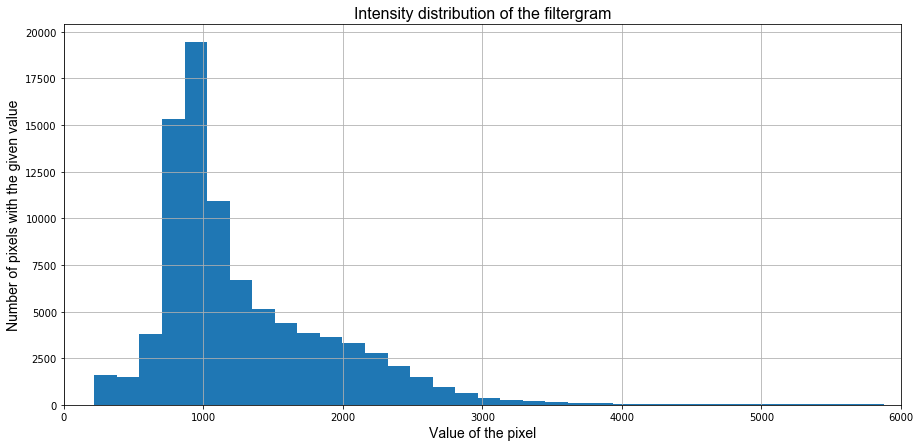

In [7]:
fig = plt.figure(figsize=(15,7))
counts, bins = np.histogram(flare_12, bins = 100)
plt.hist(bins[:-1], bins,  weights=counts)
plt.xlabel("Value of the pixel", **axis_font)
plt.ylabel("Number of pixels with the given value", **axis_font)
plt.xlim(0, 6000)
plt.title("Intensity distribution of the filtergram", **title_font)
plt.grid();

**Binary map:**

From  the  histogram we'll choose  a  value  that  is  suitable  as  an  intensity  threshold for the detection of  flare pixels. In this binary map, all pixels that have intensities above the threshold getthe value 1, all others 0. 

In [46]:
th = 5000 # chosen threshold as we look for most bright spots

def bin_mask(flare):
    mask = np.empty(shape=[b-a, d-c])
    for k in range (0, b-a):
        for j in range (0, d-c):
            if (flare[k][j]) >= th:
                mask[k][j] = 1
            else:
                mask[k][j] = 0
    return mask

mask_12 = bin_mask(flare_12)

To reduce noise median filtration procedure is applied to the binary image:

In [47]:
mask_filt_12 = scipy.ndimage.median_filter(mask_12, size=3, mode='reflect')

To check whether the threshold selected is a suitable one, let's plot two maps side by side: the image itself and the binary map of the detected flare pixels:

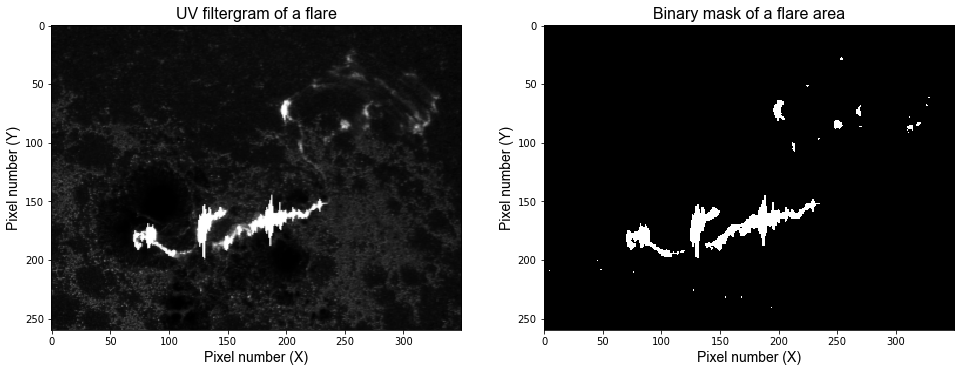

In [56]:
fig = plt.figure(figsize=(25, 15))

ax1 = fig.add_subplot(2,3,1)
ax1.set_xlabel('Pixel number (X)', **axis_font)
ax1.set_ylabel('Pixel number (Y)',  **axis_font)
ax1.imshow(flare_12, cmap='Greys_r')
ax1.set_title('UV filtergram of a flare', **title_font)

ax2 = fig.add_subplot(2,3,2)
ax2.set_xlabel('Pixel number (X)', **axis_font)
ax2.set_ylabel('Pixel number (Y)',  **axis_font)
ax2.imshow(mask_12, cmap='Greys_r')
ax2.set_title('Binary mask of a flare area', **title_font);

Checking if median filtering works properly:

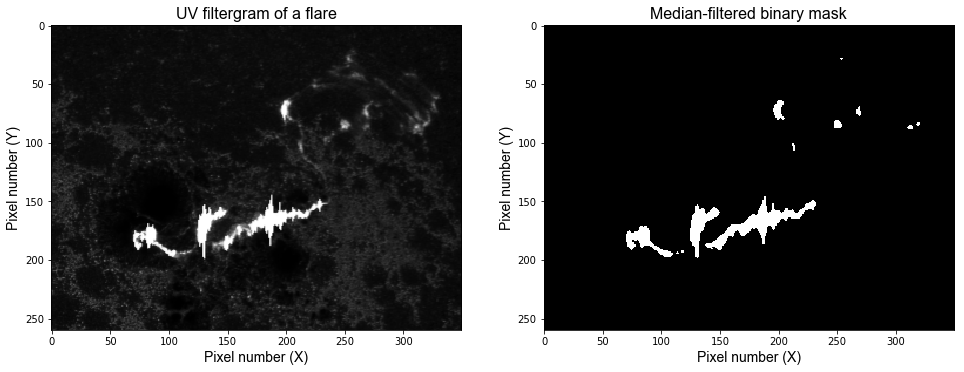

In [49]:
fig = plt.figure(figsize=(25, 15))

ax1 = fig.add_subplot(2,3,1)
ax1.set_xlabel('Pixel number (X)', **axis_font)
ax1.set_ylabel('Pixel number (Y)',  **axis_font)
ax1.imshow(flare_12, cmap='Greys_r')
ax1.set_title('UV filtergram of a flare', **title_font)

ax2 = fig.add_subplot(2,3,2)
ax2.set_xlabel('Pixel number (X)', **axis_font)
ax2.set_ylabel('Pixel number (Y)',  **axis_font)
ax2.imshow(mask_filt_12, cmap='Greys_r', norm=colors.Normalize(vmin=0, vmax=1))
ax2.set_title('Median-filtered binary mask', **title_font);


**Let's check for other time ranges if chosen threshold is suitable for flare detection:** 

Images taken at:
2014-10-24T21:00:54.71
2014-10-24T21:12:54.71
2014-10-24T21:24:54.71
2014-10-24T21:36:54.71
2014-10-24T21:48:54.71


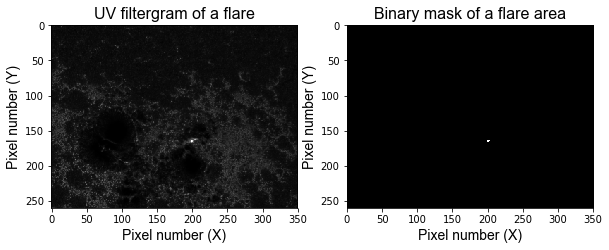

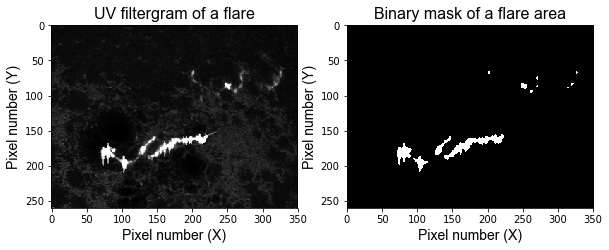

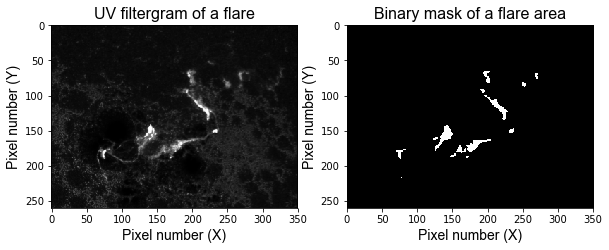

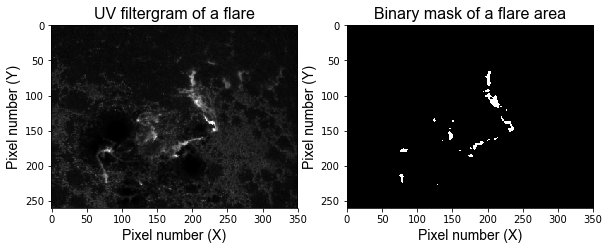

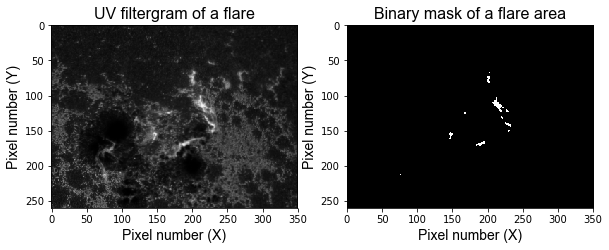

In [115]:
print('Images taken at:')
for i in range(0, 49, 10):
    flare_i = data[i][a:b, c:d]
    mask_filt = scipy.ndimage.median_filter(bin_mask(flare_i), size=3, mode='reflect')
    print(header[i]['DATE-OBS'])
    fig = plt.figure(figsize=(15, 15))

    ax1 = fig.add_subplot(2,3,1)
    ax1.set_xlabel('Pixel number (X)', **axis_font)
    ax1.set_ylabel('Pixel number (Y)',  **axis_font)
    ax1.imshow(flare_i, cmap='Greys_r')
    ax1.set_title('UV filtergram of a flare', **title_font)
    
    ax2 = fig.add_subplot(2,3,2)
    ax2.set_xlabel('Pixel number (X)', **axis_font)
    ax2.set_ylabel('Pixel number (Y)',  **axis_font)
    ax2.imshow(mask_filt, cmap='Greys_r', norm=colors.Normalize(vmin=0, vmax=1))
    ax2.set_title('Binary mask of a flare area', **title_font);

**Let's calculate the area of the flare determined from the AIA data and study its evolution in time.**

We use derived filtered flare pixel masks to calculate the total number of flare pixels:

In [71]:
def flare_pix(mask_filt):
    flare_pix = 0
    for k in range (0, b-a):
        for j in range (0, d-c):
            if mask_filt[k][j] == 1:
                flare_pix += 1
    return flare_pix

flare_pix_num_12 = flare_pix(mask_filt_12)
flare_pix_num_12

2015

Now let's calculate the **total area A of the flare** by multiplying the flare pixel number by the area of one pixel in physical units. For that we need to obtain area of one pixel in physical units (in km^2) using data in FITS-header:

In [72]:
# the angular resolution per pixel scale along both axes 
resol_1 = header[12]['CDELT1'] # arcsec/pix
resol_2 = header[12]['CDELT2']
arcsec_sun = header[12]['RSUN_OBS'] # radius of Sun in arcseconds

R_sun = 696340 # km
km_per_arcsec = R_sun / arcsec_sun     

area_unit = (resol_1 * km_per_arcsec) * (resol_2 * km_per_arcsec) # km^2

flare_sq_12 = flare_pix_num_12 * area_unit # km^2

flare_sq_12

1576458028.7853503

**Now let's obtain the square of a flare area A for each time step:**

In [74]:
# array of squares
squares = []

for i in range(49):
    flare_i = data[i][a:b, c:d] # subfield
    mask_filt_i = scipy.ndimage.median_filter(bin_mask(flare_i), size=3, mode='reflect')
    flare_sq = flare_pix(mask_filt_i) * area_unit
    squares.append(flare_sq)    
    
squares = np.array(squares)

**Next let's build a timeline for given files:**

In [86]:
# array of time steps
times = []

for i in range(49):
    times.append(header[i]['DATE-OBS'])

times = pd.Series(times)
times = pd.to_datetime(times).dt.strftime('%H:%M')

**Let's plot the flare area evolution as a function of time, A(t) with time in minutes and seconds.**

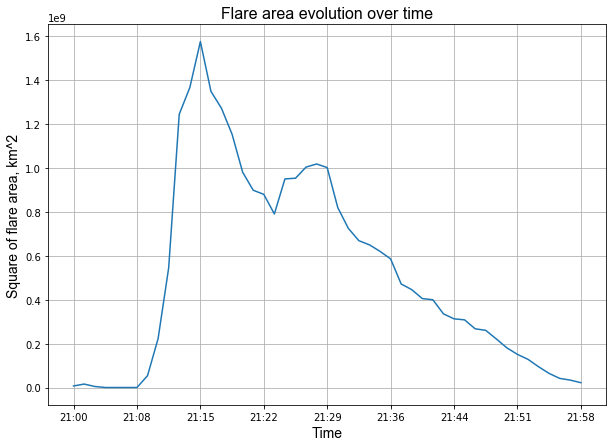

In [110]:
locator = matplotlib.ticker.MaxNLocator(nbins=10)

fig, ax = plt.subplots(figsize=(10, 7))

plt.plot(times, squares)

ax.set_xlabel('Time', **axis_font)

ax.set_ylabel('Square of flare area, km^2', **axis_font)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator)
ax.set_title('Flare area evolution over time', **title_font)
ax.grid()

**From the resulting flare area evolution, let's calculate at which time the area has its maximum and how large is this maximum flare area:**

In [112]:
print('Maximum area of a flare {:.0f} km^2'.format(squares.max()))

Maximum area of a flare 1576458029 km^2


In [114]:
print('Area has its maximum at', times[squares.argmax()])

Area has its maximum at 21:15


**Learning log:**  
Magnetic energy drives different eruptive phenomena. In this assignment we've studied the flares – sudden enhancements of radiation in localized regions of the Sun (sunspot areas). They are most prominent in EUV, UV, X-ray and long wavelengths, so we've dealed with the filter on UV 1700 Å as it is in particular useful to study the signature of flares in the lower chromosphere. The aim was to study X-class flare on 24 Oct 2014 by looking at forming bright ribbons of eruption. In fact, there were several substantial flares from one unusually giant sunspot.  
Is is seen at the sequence of pictures as the flare ribbons separate early in the process (suggesting reconnection higher in the corona). Also that can be seen is negative effects of blooming and saturation of imaging from the very bright flare pixels.  
From the area time evolution we can see that the process is truly sudden – the biggest area forms during just several minutes and then it gradually disappears over 1 hour. 